In [2]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Insurance Claim.csv')

# Display the first few rows of the dataset
data.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
# Check for null values in the dataset
null_counts = data.isnull().sum()

null_counts


index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [5]:
# Drop rows containing null values
cleaned_data = data.dropna()

# Check the shape of the dataset before and after dropping null values
original_shape = data.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape


((1340, 11), (1332, 11))

In [6]:
# Drop the first two columns
cleaned_data = cleaned_data.drop(columns=['index', 'PatientID'])

# Display the first few rows of the updated dataset
cleaned_data.head()


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [7]:
# Encode the categorical columns using one-hot encoding
encoded_data = pd.get_dummies(cleaned_data, columns=['gender', 'diabetic', 'smoker', 'region'], dtype=float,drop_first=True)

# Display the first few rows of the encoded dataset
encoded_data.head()


,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,1.0,1.0,0.0,0.0,1.0,0.0
1,24.0,30.1,87,0,1131.51,1.0,0.0,0.0,0.0,1.0,0.0
7,19.0,41.1,100,0,1146.80,1.0,0.0,0.0,1.0,0.0,0.0
8,20.0,43.0,86,0,1149.40,1.0,0.0,0.0,1.0,0.0,0.0
9,30.0,53.1,97,0,1163.46,1.0,0.0,0.0,1.0,0.0,0.0


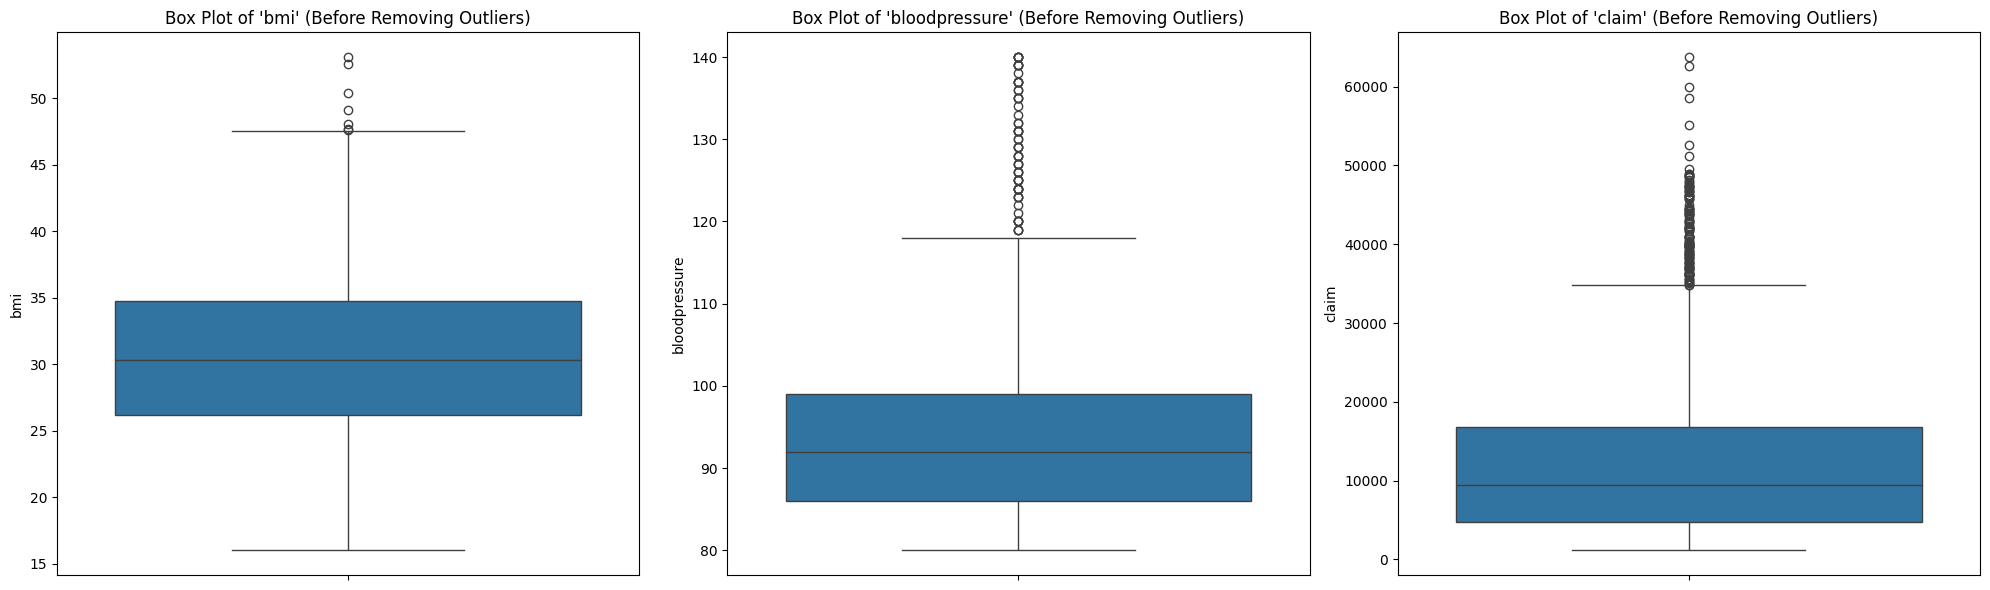

In [8]:
# Set up the figure and axes , box plot


import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot box plot for 'bmi'
sns.boxplot(y=encoded_data['bmi'], ax=axes[0])
axes[0].set_title("Box Plot of 'bmi' (Before Removing Outliers)")
axes[0].set_ylabel('bmi')

# Plot box plot for 'bloodpressure'
sns.boxplot(y=encoded_data['bloodpressure'], ax=axes[1])
axes[1].set_title("Box Plot of 'bloodpressure' (Before Removing Outliers)")
axes[1].set_ylabel('bloodpressure')

# Plot box plot for 'claim'
sns.boxplot(y=encoded_data['claim'], ax=axes[2])
axes[2].set_title("Box Plot of 'claim' (Before Removing Outliers)")
axes[2].set_ylabel('claim')

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import zscore

# Calculate Z-scores for 'bmi', 'bloodpressure', and 'claim'
z_scores_bmi = zscore(encoded_data['bmi'])
z_scores_bp = zscore(encoded_data['bloodpressure'])
z_scores_claim = zscore(encoded_data['claim'])

# Filter the data to remove outliers based on all three columns
filtered_data_all = encoded_data[
    (abs(z_scores_bmi) <= 3) & 
    (abs(z_scores_bp) <= 3) & 
    (abs(z_scores_claim) <= 3)
]

# Check the shape of the dataset before and after removing outliers
filtered_all_shape = filtered_data_all.shape

filtered_all_shape


(1289, 11)

In [10]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = filtered_data_all[['bmi', 'bloodpressure', 'smoker_Yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = filtered_data_all['claim']

# Add a constant to the independent variables matrix to account for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the model summary
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          5.16e-307
Time:                        10:08:18   Log-Likelihood:                -13121.
No. Observations:                1289   AIC:                         2.626e+04
Df Residuals:                    1282   BIC:                         2.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.009e+04   1995.285    -10.070      0.000    -2.4e+04   -1.62e+04
bmi                350.8008     30.664     11.440      0.000     290.643     410.959
bloodpressure      216.0847     20.220     10.687      0.000     176.418     255.752
smoker_Yes        2.034e+04    490.746     41.445      0.000    1.94e+04    2.13e+04
region_northwest -2023.8866    556.446     -3.637      0.000   -3115.531    -932.242
region_southeast -2849.6419    539.525     -5.282      0.000   -3908.090   -1791.194
region_southwest -2216.6268    569.168     -3.895      0.000   -3333.229   -1100.024
==============================================================================
Omnibus:                      158.882   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.088
Skew:                           0.846   Prob(JB):                     3.00e-55
Kurtosis:                       4.347   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here's an evaluation of the regression model using the original (non-log transformed) data:

R-squared: 0.673. This indicates that approximately 67.3% of the variance in the claim variable is explained by the predictors in the model.
Adjusted R-squared: 0.672. This metric takes into account the number of predictors in the model and can be a more accurate measure of goodness-of-fit, especially when multiple predictors are included.
F-statistic: 439.9 with a very small associated p-value. This suggests that at least one of the predictors is significant.
Coefficients:
The bmi coefficient is 350.8008, meaning that for every unit increase in BMI, the claim amount increases by approximately $350.80, all else being equal.
The bloodpressure coefficient is 216.0847, so for every unit increase in blood pressure, the claim amount increases by approximately $216.08, all else being equal.
Being a smoker increases the claim amount by approximately $20,340.
Being from the northwest, southeast, or southwest region decreases the claim amount compared to the reference region (northeast).
AIC and BIC: These are 26260 and 26290, respectively. They provide a measure of the model's goodness of fit, with lower values being preferred. They can be especially useful for model comparison.
Significance of Coefficients: All predictors are statistically significant, as indicated by their p-values being below 0.05.
Note: The model has a note indicating potential multicollinearity, which means that some predictors might be correlated. This can sometimes affect the stability of the coefficient estimates.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor in the model
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Variable,VIF
0,const,125.584192
1,bmi,1.073136
2,bloodpressure,1.155426
3,smoker_Yes,1.147411
4,region_northwest,1.885958
5,region_southeast,2.034122
6,region_southwest,1.845842


Typically, a VIF value above 5 (or in some stricter cases, above 10) suggests that multicollinearity might be a concern. In this dataset, all VIF values are well below these thresholds, indicating that multicollinearity is not likely a significant issue for this regression model.

Hence, the earlier note in the regression output regarding potential multicollinearity might not be a major concern given these VIF values.

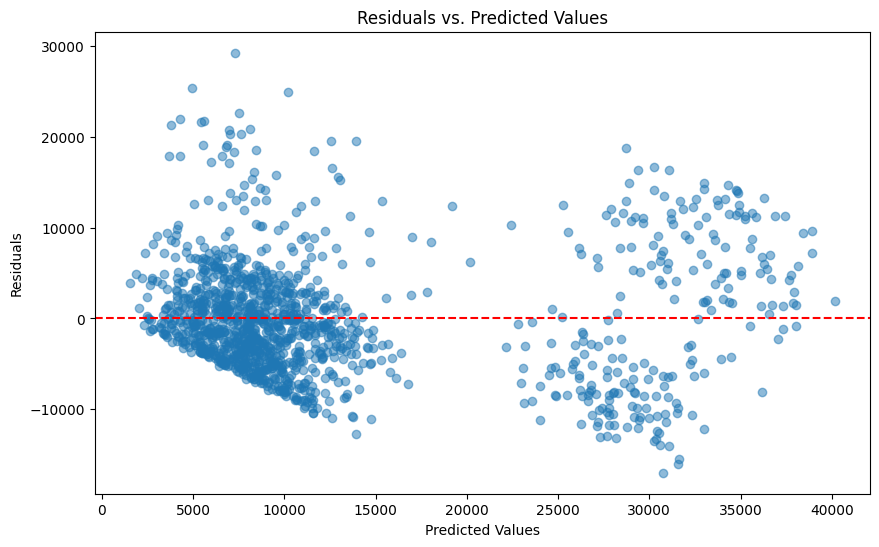

In [21]:
# Calculate residuals and predicted values
residuals = model.resid
predicted_values = model.fittedvalues

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


The residuals appear to be randomly scattered around the zero line, which is a good sign. This suggests that the linearity assumption is likely met.

The Durbin-Watson statistic for the regression model is approximately 1.224.

Recall that:

A value close to 2 suggests no autocorrelation.
Values below 2 indicate positive autocorrelation.
Values above 2 indicate negative autocorrelation.
Given our Durbin-Watson statistic of 
1.224
1.224, there's evidence of some positive autocorrelation in the residuals. This suggests that the independence of residuals assumption might be violated.

The plot of residuals against their order also didn't show any clear pattern, which is a good sign. However, given the Durbin-Watson result, it might be worth considering potential reasons for the observed autocorrelation and exploring methods to address it if necessary.

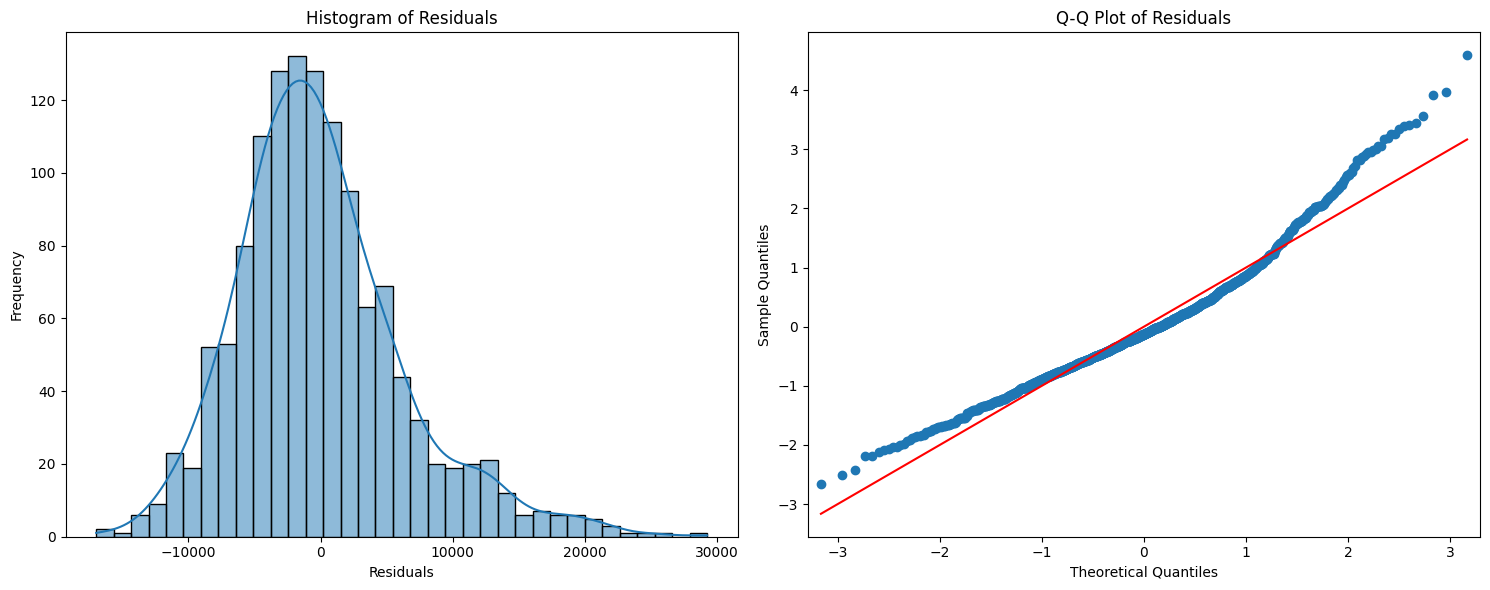

In [22]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Plot Q-Q plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1], fit=True)
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


The plots provide insights into the distribution of the residuals:

Histogram: The histogram of the residuals, along with the kernel density estimate (the smooth line), indicates that the distribution of residuals is roughly bell-shaped. There seems to be a slight deviation from the perfect normal distribution, but it's relatively close.

Q-Q Plot: The quantile-quantile plot compares the quantiles of the residuals to the quantiles of a standard normal distribution. The points lying approximately on the straight line suggest that the residuals are normally distributed. There are some deviations at the tails, but this is not uncommon in real-world datasets.

In [23]:
# homoscedasticity assumption
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(residuals, X)

bp_test_statistic, bp_p_value


(80.47484940894435, 2.8504726196022266e-15)

The p-value is well below the common alpha level of 
0.05
0.05, indicating that we reject the null hypothesis of homoscedasticity. This suggests that the variances of the residuals are not equal across levels of the independent variables, violating the equal variance (homoscedasticity) assumption.

In [29]:
# Reload the dataset and preprocess it for the original regression model
from scipy import stats
df_reload = pd.read_csv('./Insurance Claim.csv')
df_reload.drop(df_reload.columns[:2], axis=1, inplace=True)
df_reload.dropna(inplace=True)
df_dummies_reload = pd.get_dummies(df_reload[['smoker', 'region']], dtype= float,drop_first=True)
df_reload = pd.concat([df_reload, df_dummies_reload], axis=1)

# Prepare the independent variables matrix for the original model
X_original = df_reload[['bmi', 'bloodpressure', 'smoker_Yes', 'region_northwest', 'region_southeast', 'region_southwest']]
X_original = sm.add_constant(X_original)

# Dependent variable for the original model
y_original = df_reload['claim']

# Re-fit the OLS model for the original data
model_original = sm.OLS(y_original, X_original).fit()

# Calculate residuals for the re-fitted model
residuals_original = model_original.resid

# Group the residuals by the 'smoker' variable
residuals_smoker = residuals_original[df_reload['smoker'] == 'Yes']
residuals_non_smoker = residuals_original[df_reload['smoker'] == 'No']

# Perform Levene's test again
levene_test_statistic, levene_p_value = stats.levene(residuals_smoker, residuals_non_smoker)
levene_test_statistic, levene_p_value


(162.09160789058927, 4.0425614017153113e-35)

The results of the Levene's test for the residuals based on the smoker variable are:

Test Statistic: 162.0916
p-value: 
4.04×10−35
 
Given the very low p-value (well below the usual 0.05 threshold), we reject the null hypothesis that the variances of the residuals for smokers and non-smokers are equal. This suggests that there might be heteroscedasticity in the regression model, meaning the variances of the residuals are not constant across levels of the independent variable (in this case, smoker status).

This violation of the equal variance assumption might influence the reliability of the regression coefficients and other statistics derived from the model. It's an aspect to consider when interpreting the results of the regression and might warrant further investigation or remedial measures.